![title](inn.png)

# Innoplexus Online Hiring Hackathon: Sentiment Analysis

## Problem Statement

### Sentiment Analysis for drugs/medicines
Nowadays the narrative of a brand is not only built and controlled by the company that owns the brand. For this reason, companies are constantly looking out across Blogs, Forums, and other social media platforms, etc for checking the sentiment for their various products and also competitor products to learn how their brand resonates in the market. This kind of analysis helps them as part of their post-launch market research. This is relevant for a lot of industries including pharma and their drugs.
 

**The challenge is that the language used in this type of content is not strictly grammatically correct. Some use sarcasm. Others cover several topics with different sentiments in one post. Other users post comments and reply and thereby indicating his/her sentiment around the topic.**

Sentiment can be clubbed into 3 major buckets - **Positive, Negative and Neutral Sentiments.**


You are provided with data containing samples of text. This text can contain one or more drug mentions. Each row contains a unique combination of the text and the drug mention. Note that the same text can also have different sentiment for a different drug.

Given the text and drug name, the task is to predict the sentiment for texts contained in the test dataset. Given below is an example of text from the dataset:


Example:

*Stelara is still fairly new to Crohn's treatment. This is why you might not get a lot of replies. I've done some research, but most of the "time to work" answers are from Psoriasis boards. For Psoriasis, it seems to be about 4-12 weeks to reach a strong therapeutic level. The good news is, Stelara seems to be getting rave reviews from Crohn's patients. It seems to be the best med to come along since Remicade. I hope you have good success with it. My daughter was diagnosed Feb. 19/07, (13 yrs. old at the time of diagnosis), with Crohn's of the Terminal Illium. Has used Prednisone and Pentasa. Started Imuran (02/09), had an abdominal abscess (12/08). 2cm of Stricture. Started ​Remicade in Feb. 2014, along with 100mgs. of Imuran.*


For Stelara the above text is **positive** while for Remicade the above text is **negative**.

### Data Description
**train.csv**
Contains the labelled texts with sentiment values for a given drug
 
|Variable|	Definition|
|----|----|
|unique_hash |Unique ID|
|text|text pertaining to the drugs|
|drug |drug name for which the sentiment is provided|
|sentiment	|(Target) 0-positive, 1-negative, 2-neutral  |


**test.csv**
test.csv contains texts with drug names for which the participants are expected to predict the correct sentiment
 

### Evaluation Metric
The metric used for evaluating the performance of the classification model would be macro F1-Score.
 

## Public and Private Split

The texts in the test data are further randomly divided into Public (40%) and Private (60%) data.
Your initial responses will be checked and scored on the Public data.
The final rankings would be based on your private score which will be published once the competition is over.

# Approaches



# Leaderboard

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input/"))
os.environ['PYTHONHASHSEED'] = '10000'
np.random.seed(10001)
import random
import tensorflow as tf
random.seed(10002)
session_conf = tf.ConfigProto(intra_op_parallelism_threads=6, inter_op_parallelism_threads=5)
from keras import backend

tf.set_random_seed(10003)
backend.set_session(tf.Session(graph=tf.get_default_graph(), config=session_conf))
# Any results you write to the current directory are saved as output.

['av _ innoplexus hiring']


Using TensorFlow backend.


In [2]:
root_path='../input/av _ innoplexus hiring/'
train=pd.read_csv(root_path+'train_F3WbcTw.csv')
test=pd.read_csv(root_path+'test_tOlRoBf.csv')
s=pd.read_csv(root_path+'sample_submission_i5xnIZD.csv')

In [3]:
train.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [4]:
train['sentiment'].value_counts()

2    3825
1     837
0     617
Name: sentiment, dtype: int64

Text(0, 0.5, 'Number of reviews ')

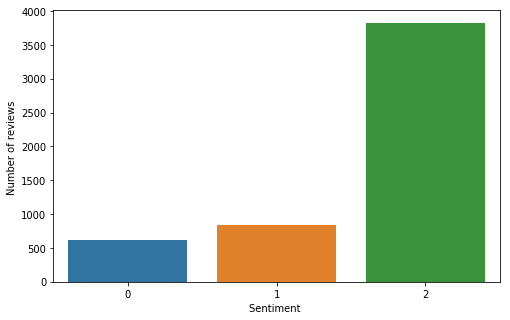

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
x = np.array(train['sentiment'].value_counts().index)
y = np.array(train['sentiment'].value_counts().values)
plt.figure(figsize=(8,5))
sns.barplot(x,y)
plt.xlabel('Sentiment ')
plt.ylabel('Number of reviews ')

In [6]:
print('Number of sentences in training set:',len(train['unique_hash'].unique()))
print('Number of sentences in test set:',len(test['unique_hash'].unique()))
print('Average words per sentence in train:',train.groupby('unique_hash')['text'].count().mean())
print('Average words per sentence in test:',test.groupby('unique_hash')['text'].count().mean())

Number of sentences in training set: 5279
Number of sentences in test set: 2924
Average words per sentence in train: 1.0
Average words per sentence in test: 1.0


In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

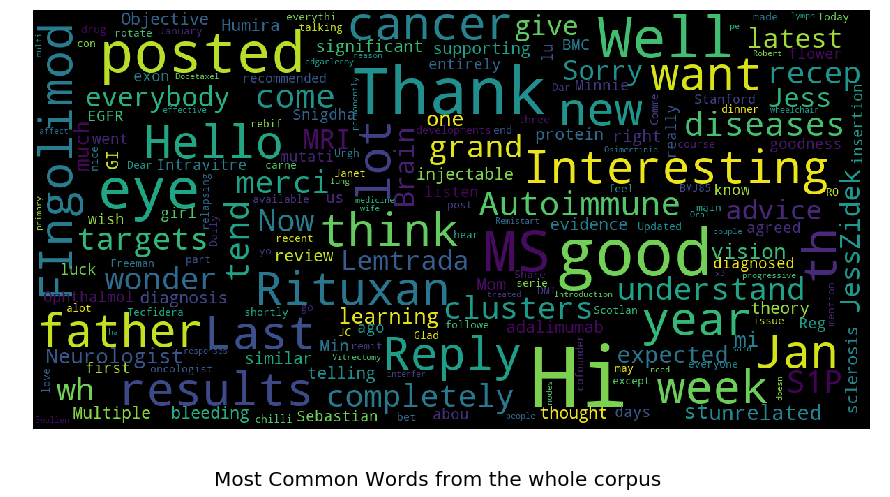

In [8]:
show_wordcloud(train['text'],'Most Common Words from the whole corpus')

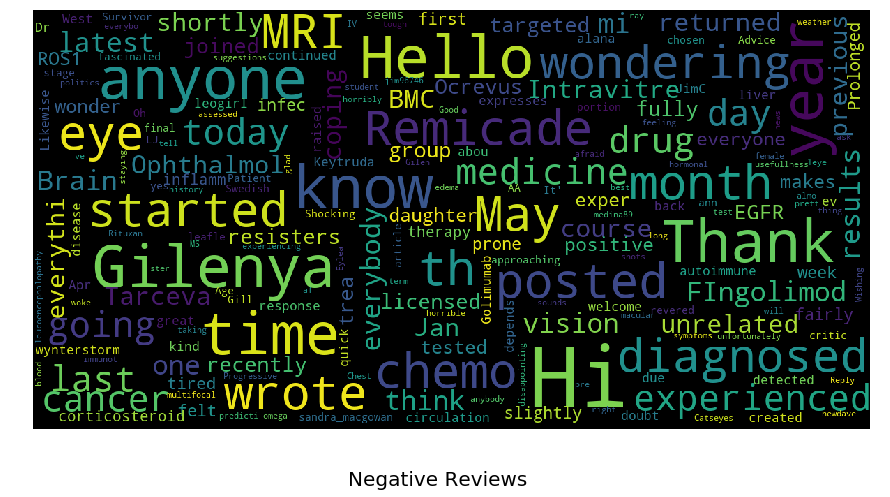

In [9]:
show_wordcloud(train[train['sentiment'] == 1]['text'],'Negative Reviews')

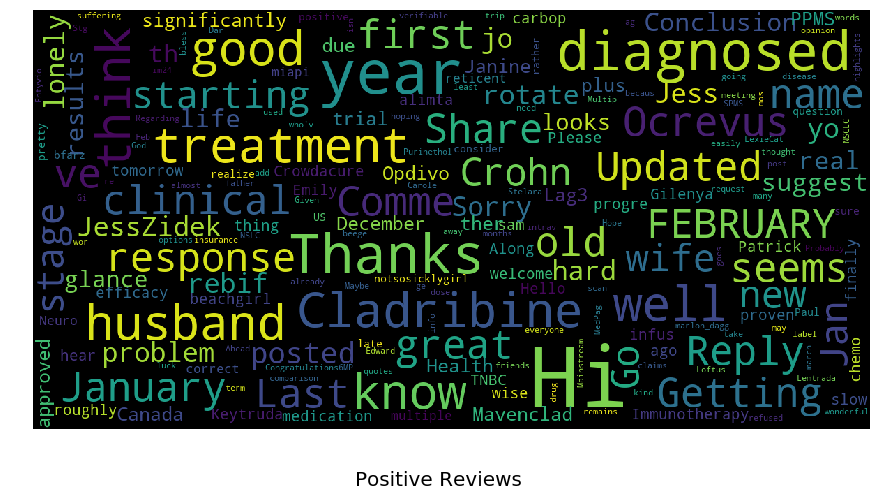

In [10]:
show_wordcloud(train[train['sentiment'] == 0]['text'],'Positive Reviews')

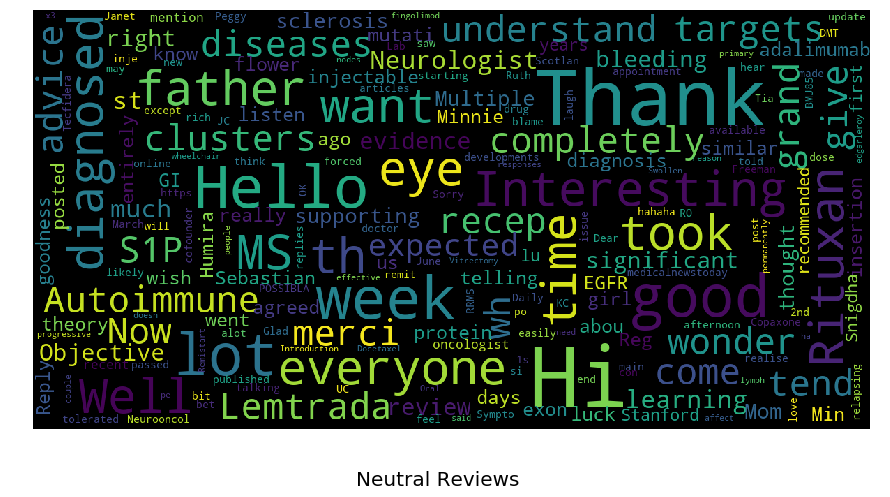

In [11]:
show_wordcloud(train[train['sentiment'] == 2]['text'],'Neutral Reviews')

In [12]:
df=train.append(test,ignore_index=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [13]:
import string
punctuation=string.punctuation
df['word_count']=df['text'].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df['text'].str.len()
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['text'].apply(lambda x: avg_word(x))
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df['numerics'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df['upper'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df['word_density'] = df['char_count'] / (df['word_count']+1)
df['punctuation_count'] = df['text'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 

In [14]:
df['drug']=pd.factorize(df['drug'])[0]

In [15]:
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
tokenizer = Tokenizer()

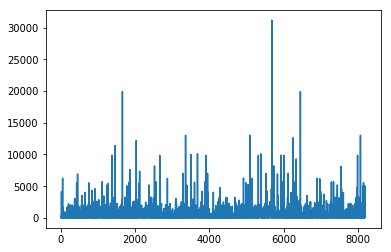

In [16]:
df.word_count.plot()

## N- Grams

In [17]:
df_train = df[df['sentiment'].isnull()==False]
df_test = df[df['sentiment'].isnull()==True]
print(df_train.shape,df_test.shape)

(5279, 12) (2924, 12)


In [18]:
# test_vectorized

In [19]:
y = train['sentiment']

In [20]:
df.columns
col=[x for x in df.columns if x not in ['sentiment','text','unique_hash']]

In [22]:
from sklearn.model_selection import train_test_split
# x_train , x_val, y_train , y_val = train_test_split(final_features,y,test_size = 0.2)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,f1_score
from lightgbm import LGBMClassifier

In [24]:
# # lr = LogisticRegression()
# # ovr = OneVsRestClassifier(lr)
# # ovr.fit(x_train,y_train)
# # print(classification_report( ovr.predict(x_val) , y_val))
# # print(accuracy_score( ovr.predict(x_val) , y_val ))
# # print(f1_score( ovr.predict(x_val) , y_val ,average='macro'))

# m=LGBMClassifier(boosting_type='gbdt',
# #                  objective= 'multiclass',
# #     num_leaves=255,
# #     max_depth=-1,
#     learning_rate=0.01,
#     n_estimators=6000,
# #     subsample_for_bin=200000,
# #     objective=None,
# #     class_weight=None,
# #     min_split_gain=0.0,
# #     min_child_weight=0.001,
#     min_child_samples=100,
# #                 ,
# #     subsample=1.0,
# #     subsample_freq=1,
# #     colsample_bytree=0.4,
# #     reg_alpha=0.5,
# #     reg_lambda=1.0,
#     random_state=1994,
#     n_jobs=-1,
#     silent=True)
# m.fit(X_train,y_train,eval_set=[(X_val, y_val.values)],early_stopping_rounds=100,verbose=100)
# p=m.predict(X_val)
# print(classification_report( p , y_val))
# print(f1_score(y_val,p,average='macro'))

In [25]:
# svm = LinearSVC()
# svm.fit(x_train,y_train)
# print(classification_report( svm.predict(x_val) , y_val))
# print(accuracy_score( svm.predict(x_val) , y_val ))
# print(f1_score( svm.predict(x_val) , y_val ,average='macro'))

In [26]:
# estimators = [ ('svm',svm) , ('ovr' , ovr) ]
# clf = VotingClassifier(estimators , voting='hard')
# clf.fit(x_train,y_train)
# print(classification_report( clf.predict(x_val) , y_val))
# print(accuracy_score( clf.predict(x_val) , y_val ))
# print(f1_score( ovr.predict(x_val) , y_val ,average='macro'))

In [27]:
from keras.utils import to_categorical
target=train.sentiment.values
y=to_categorical(target)
y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

## Data Preprocessing

In [29]:

import re
import nltk

def url_to_words(raw_text):
    raw_text=raw_text.strip()
    no_coms=re.sub(r'\.com','',raw_text)
    no_urls=re.sub('https?://www','',no_coms)
    no_urls1=re.sub('https?://','',no_urls)
    try:
        no_encoding=no_urls1.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        no_encoding = no_urls1
    letters_only = re.sub("[^a-zA-Z0-9]", " ",no_encoding) 
    words = letters_only.lower().split()                             
    stops = stop                 
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [30]:
# freq = pd.Series(' '.join(df_train['text']).split()).value_counts()[:10]
# freq = list(freq.index)
# df_train['text'] = df_train['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

# freq = pd.Series(' '.join(df_train['text']).split()).value_counts()[-10:]
# freq = list(freq.index)
# df_train['text'] = df_train['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))


# from nltk.stem import PorterStemmer,SnowballStemmer
# st = SnowballStemmer('english')
# df_train['text']=df_train['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
# df_test['text']=df_test['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

# print('Done')
# from textblob import Word
# df_train['text'] = df_train['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
# df_test['text']=df_test['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [31]:
df_train['text']=df_train['text'].apply(url_to_words)
df_test['text']=df_test['text'].apply(url_to_words)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
df_train['text'].values

array(['autoimmune diseases tend come clusters gilenya feel good think change anything waste time energy taking tysabri feel amazing symptoms dodgy color vision since always know know last month year decade ive decided enjoy ride point worrying',
       'completely understand want try results reported lectures always stand scrutiny peer review publication much still convincing hope work really aware happy risks great think important present balanced way understand move straight first show promise animal study using drugs humans still lot animal data gather human data gather anyone tell safe effective tell many times animal studies follow humans one major attrition points drug development unpredictability issues cladribine gilenya interaction predicted people try doctors see patterns work going clemastine metformin exciting given said current condition personal risk tolerance makes sense try definitely everyone',
       'interesting targets s1p 1 5 receptors rather 1 5 like fingolimod h

In [34]:
from scipy.sparse import csr_matrix
from scipy import sparse
# final_features = sparse.hstack((df_train[col],train_vectorized )).tocsr()
# final_featurest = sparse.hstack((df_test[col],test_vectorized )).tocsr()

In [35]:
from sklearn.model_selection import train_test_split
X_train , X_val , Y_train , Y_val = train_test_split(df_train['text'],y,test_size = 0.20)
# X_train , X_val , Y_train , Y_val = train_test_split(final_features,y,test_size = 0.20)

In [36]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,GRU,LSTM,Embedding
from keras.optimizers import Adam
from keras.layers import SpatialDropout1D,Dropout,Bidirectional,Conv1D,GlobalMaxPooling1D,MaxPooling1D,Flatten
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping,ReduceLROnPlateau

In [37]:
tokenizer = Tokenizer(num_words=50000,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(list(X_train))

word_index = tokenizer.word_index

X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

In [38]:
# X_train
# nb_words = 
max_features = len(word_index) + 1
max_words = 350
batch_size = 1024
epochs = 10
num_classes=3

In [39]:
X_test = tokenizer.texts_to_sequences(df_test['text'])
X_test =pad_sequences(X_test, maxlen=max_words)

In [40]:
# X_val

In [41]:
X_train =pad_sequences(X_train, maxlen=max_words)
X_val = pad_sequences(X_val, maxlen=max_words)

In [42]:
# import tensorflow as tf
# from keras.losses import binary_crossentropy, categorical_crossentropy
# import keras.backend as K
# import numpy as np
# from prettytable import PrettyTable
# from prettytable import ALL
# from sklearn.metrics import f1_score
# def f1(y_true, y_pred):
#     y_pred = K.round(y_pred)
#     tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
#     tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
#     fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
#     fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

#     p = tp / (tp + fp + K.epsilon())
#     r = tp / (tp + fn + K.epsilon())

#     f1 = 2*p*r / (p+r+K.epsilon())
#     f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
#     return K.mean(f1)

# def f1_loss(y_true, y_pred):
    
#     tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
#     tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
#     fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
#     fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

#     p = tp / (tp + fp + K.epsilon())
#     r = tp / (tp + fn + K.epsilon())

#     f1 = 2*p*r / (p+r+K.epsilon())
#     f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
#     return 1 - K.mean(f1)

In [43]:
from keras.engine.topology import Layer
from keras import backend as K
from keras import initializers, regularizers, constraints, optimizers, layers
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

# BERT

In [46]:
!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
!wget https://raw.githubusercontent.com/google-research/bert/master/modeling.py 
!wget https://raw.githubusercontent.com/google-research/bert/master/optimization.py 
!wget https://raw.githubusercontent.com/google-research/bert/master/run_classifier.py 
!wget https://raw.githubusercontent.com/google-research/bert/master/tokenization.py 

--2019-07-26 17:09:14--  https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 2a00:1450:400c:c0c::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407727028 (389M) [application/zip]
Saving to: ‘uncased_L-12_H-768_A-12.zip’

uncased_L-12_H-768_ 100%[===================>] 388.84M   124MB/s    in 3.2s    

2019-07-26 17:09:17 (122 MB/s) - ‘uncased_L-12_H-768_A-12.zip’ saved [407727028/407727028]

--2019-07-26 17:09:18--  https://raw.githubusercontent.com/google-research/bert/master/modeling.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37922 (37K) [text/

In [47]:
import modeling
import optimization
import run_classifier
import tokenization

In [48]:
import zipfile
folder = 'model_folder'
with zipfile.ZipFile("uncased_L-12_H-768_A-12.zip","r") as zip_ref:
    zip_ref.extractall(folder)

In [49]:
BERT_MODEL = 'uncased_L-12_H-768_A-12'
BERT_PRETRAINED_DIR = f'{folder}/uncased_L-12_H-768_A-12'
OUTPUT_DIR = f'{folder}/outputs'
print(f'>> Model output directory: {OUTPUT_DIR}')
print(f'>>  BERT pretrained directory: {BERT_PRETRAINED_DIR}')

>> Model output directory: model_folder/outputs
>>  BERT pretrained directory: model_folder/uncased_L-12_H-768_A-12


In [50]:
df_train["sentiment"].values.astype(int)

array([2, 2, 2, ..., 2, 2, 0])

In [51]:
# X_train, X_test, y_train, y_test = train_test_split(df_train["text"].values, df_train["sentiment"].values.astype(int), test_size=0.2, random_state=42)

In [52]:
def create_examples(lines, set_type, labels=None):
#Generate data for the BERT model
    guid = f'{set_type}'
    examples = []
    if guid == 'train':
        for line, label in zip(lines, labels):
            text_a = line
            label = str(label)
            examples.append(
              run_classifier.InputExample(guid=guid, text_a=text_a, text_b=None, label=label))
    else:
        for line in lines:
            text_a = line
            label = '0'
            examples.append(
              run_classifier.InputExample(guid=guid, text_a=text_a, text_b=None, label=label))
    return examples

In [53]:
# Model Hyper Parameters
TRAIN_BATCH_SIZE = 32
EVAL_BATCH_SIZE = 32
LEARNING_RATE = 1e-5
NUM_TRAIN_EPOCHS = 3
WARMUP_PROPORTION = 0.1
MAX_SEQ_LENGTH = 100
# Model configs
SAVE_CHECKPOINTS_STEPS = 100000 #if you wish to finetune a model on a larger dataset, use larger interval
# each checpoint weights about 1,5gb
ITERATIONS_PER_LOOP = 100000
NUM_TPU_CORES = 8
VOCAB_FILE = os.path.join(BERT_PRETRAINED_DIR, 'vocab.txt')
CONFIG_FILE = os.path.join(BERT_PRETRAINED_DIR, 'bert_config.json')
INIT_CHECKPOINT = os.path.join(BERT_PRETRAINED_DIR, 'bert_model.ckpt')
DO_LOWER_CASE = BERT_MODEL.startswith('uncased')

In [54]:
label_list = [0,1,2]
tokenizer = tokenization.FullTokenizer(vocab_file=VOCAB_FILE, do_lower_case=DO_LOWER_CASE)
train_examples = create_examples(df_train["text"].values, 'train', labels=df_train["sentiment"].values.astype(int))

tpu_cluster_resolver = None #Since training will happen on GPU, we won't need a cluster resolver
#TPUEstimator also supports training on CPU and GPU. You don't need to define a separate tf.estimator.Estimator.
run_config = tf.contrib.tpu.RunConfig(
    cluster=tpu_cluster_resolver,
    model_dir=OUTPUT_DIR,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS,
    tpu_config=tf.contrib.tpu.TPUConfig(
        iterations_per_loop=ITERATIONS_PER_LOOP,
        num_shards=NUM_TPU_CORES,
        per_host_input_for_training=tf.contrib.tpu.InputPipelineConfig.PER_HOST_V2))

In [55]:
num_train_steps = int(
    len(train_examples) / TRAIN_BATCH_SIZE * NUM_TRAIN_EPOCHS)
num_warmup_steps = int(num_train_steps * WARMUP_PROPORTION)

model_fn = run_classifier.model_fn_builder(
    bert_config=modeling.BertConfig.from_json_file(CONFIG_FILE),
    num_labels=len(label_list),
    init_checkpoint=INIT_CHECKPOINT,
    learning_rate=LEARNING_RATE,
    num_train_steps=num_train_steps,
    num_warmup_steps=num_warmup_steps,
    use_tpu=False, #If False training will fall on CPU or GPU, depending on what is available  
    use_one_hot_embeddings=True)


In [56]:
estimator = tf.contrib.tpu.TPUEstimator(
    use_tpu=False, #If False training will fall on CPU or GPU, depending on what is available 
    model_fn=model_fn,
    config=run_config,
    train_batch_size=TRAIN_BATCH_SIZE,
    eval_batch_size=EVAL_BATCH_SIZE)

In [57]:
# train_examples
# label_list

In [58]:
import datetime
print('Please wait...')
train_features = run_classifier.convert_examples_to_features(train_examples,{'0':0,'1':1,'2':2}, MAX_SEQ_LENGTH, tokenizer)
print('>> Started training at {} '.format(datetime.datetime.now()))
print('  Num examples = {}'.format(len(train_examples)))
print('  Batch size = {}'.format(TRAIN_BATCH_SIZE))
tf.logging.info("  Num steps = %d", num_train_steps)
train_input_fn = run_classifier.input_fn_builder(
    features=train_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=True,
    drop_remainder=True)
estimator.train(input_fn=train_input_fn, max_steps=num_train_steps)
print('>> Finished training at {}'.format(datetime.datetime.now()))

Please wait...
>> Started training at 2019-07-26 17:10:02.901767 
  Num examples = 5279
  Batch size = 32
>> Finished training at 2019-07-26 17:14:33.846971


In [59]:
def input_fn_builder(features, seq_length, is_training, drop_remainder):
  """Creates an `input_fn` closure to be passed to TPUEstimator."""

  all_input_ids = []
  all_input_mask = []
  all_segment_ids = []
  all_label_ids = []

  for feature in features:
    all_input_ids.append(feature.input_ids)
    all_input_mask.append(feature.input_mask)
    all_segment_ids.append(feature.segment_ids)
    all_label_ids.append(feature.label_id)

  def input_fn(params):
    """The actual input function."""
    print(params)
    batch_size = 500

    num_examples = len(features)

    d = tf.data.Dataset.from_tensor_slices({
        "input_ids":
            tf.constant(
                all_input_ids, shape=[num_examples, seq_length],
                dtype=tf.int32),
        "input_mask":
            tf.constant(
                all_input_mask,
                shape=[num_examples, seq_length],
                dtype=tf.int32),
        "segment_ids":
            tf.constant(
                all_segment_ids,
                shape=[num_examples, seq_length],
                dtype=tf.int32),
        "label_ids":
            tf.constant(all_label_ids, shape=[num_examples], dtype=tf.int32),
    })

    if is_training:
      d = d.repeat()
      d = d.shuffle(buffer_size=100)

    d = d.batch(batch_size=batch_size, drop_remainder=drop_remainder)
    return d

  return input_fn

In [60]:
predict_examples = create_examples(df_test['text'].values, 'test')

predict_features = run_classifier.convert_examples_to_features(
    predict_examples, {'0':0,'1':1,'2':2}, MAX_SEQ_LENGTH, tokenizer)

predict_input_fn = input_fn_builder(
    features=predict_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=False,
    drop_remainder=False)

result = estimator.predict(input_fn=predict_input_fn)

In [61]:
preds = []
for prediction in result:
      preds.append(np.argmax(prediction['probabilities']))

{}


In [62]:
# preds

s.sentiment=preds
s.to_csv('sub_BERT_kv11_hypertuned.csv',index=False)
s.head()

,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,2
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


## CNN

In [65]:
# model_GRU=Sequential()
# model_GRU.add(Embedding(max_features,100,mask_zero=True))
# model_GRU.add(GRU(64,dropout=0.4,return_sequences=True))
# model_GRU.add(GRU(32,dropout=0.5,return_sequences=False))
# model_GRU.add(Dense(num_classes,activation='softmax'))
# model_GRU.compile(loss='binary_crossentropy',optimizer=Adam(lr = 0.01),metrics=['accuracy'])
# model_GRU.summary()
from keras.models import Model
from keras.layers import Input, Embedding, Dense, Conv2D, MaxPool2D
from keras.layers import Reshape, Flatten, Concatenate, Dropout, SpatialDropout1D

filter_sizes = [1,2,3,5]
num_filters = 36
inp = Input(shape=(max_words,))
x = Embedding(max_features, 300)(inp)
x = Reshape((max_words, 300, 1))(x)
maxpool_pool = []
for i in range(len(filter_sizes)):
    conv = Conv2D(num_filters, kernel_size=(filter_sizes[i], 300),
                                 kernel_initializer='he_normal', activation='relu')(x)
    maxpool_pool.append(MaxPool2D(pool_size=(max_words - filter_sizes[i] + 1, 1))(conv))
z = Concatenate(axis=1)(maxpool_pool)   
z = Flatten()(z)
z = Dropout(0.1)(z)
outp = Dense(num_classes, activation="softmax")(z)
model = Model(inputs=inp, outputs=outp)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 350)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 350, 300)     10949400    input_1[0][0]                    
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 350, 300, 1)  0           embedding_1[0][0]                
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 350, 1, 36)   10836       reshape_1[0][0]                  
__________________________________________________________________________________________________
conv2d_2 (

In [66]:
# X_train

In [67]:
%%time
early_stopping = EarlyStopping(monitor="val_acc", patience=2, verbose=1)
history=model.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1,callbacks=[early_stopping])

Train on 4223 samples, validate on 1056 samples
Epoch 1/10
4223/4223 [==============================] - 6s 1ms/step - loss: 1.0829 - acc: 0.3642 - val_loss: 0.9223 - val_acc: 0.7273
Epoch 2/10
4223/4223 [==============================] - 1s 274us/step - loss: 0.8486 - acc: 0.7239 - val_loss: 0.7877 - val_acc: 0.7273
Epoch 3/10
4223/4223 [==============================] - 1s 274us/step - loss: 0.7365 - acc: 0.7239 - val_loss: 0.7614 - val_acc: 0.7273
Epoch 00003: early stopping
CPU times: user 3.1 s, sys: 2.92 s, total: 6.02 s
Wall time: 8.71 s


In [68]:
# s.shape

In [69]:
print(f1_score(np.argmax(model.predict(X_val),axis=1),np.argmax(Y_val,axis=1),average='macro'))
y_pred=model.predict(X_test, verbose=1)
s.sentiment=np.argmax(y_pred,axis=1)
s.to_csv('sub_2DCNN.csv',index=False)
s.head()

0.28070175438596495
1088/2924 [==========>...................] - ETA: 0s

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


2924/2924 [==============================] - 0s 149us/step


,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,2
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


## Bi CuDNNLSTM with Attention

In [70]:
from keras.layers import Dense, Input, CuDNNLSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
inp = Input(shape=(max_words,))
x = Embedding(max_features, 300)(inp)
x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)
x = Bidirectional(CuDNNLSTM(64, return_sequences=True))(x)
x = Attention(max_words)(x)
x = Dense(64, activation="relu")(x)
x = Dense(num_classes, activation="softmax")(x)
modelATT = Model(inputs=inp, outputs=x)
modelATT.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-3), metrics=['accuracy'])
modelATT.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 350)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 350, 300)          10949400  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 350, 256)          440320    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 350, 128)          164864    
_________________________________________________________________
attention_1 (Attention)      (None, 128)               478       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total para

In [71]:
%%time
early_stopping = EarlyStopping(monitor="val_acc", patience=2, verbose=1)
historyATT=modelATT.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1,callbacks=[early_stopping])

Train on 4223 samples, validate on 1056 samples
Epoch 1/10
4223/4223 [==============================] - 4s 942us/step - loss: 1.0010 - acc: 0.5896 - val_loss: 0.8416 - val_acc: 0.7273
Epoch 2/10
4223/4223 [==============================] - 2s 495us/step - loss: 0.8227 - acc: 0.7239 - val_loss: 0.7974 - val_acc: 0.7273
Epoch 3/10
4223/4223 [==============================] - 2s 494us/step - loss: 0.7885 - acc: 0.7239 - val_loss: 0.7816 - val_acc: 0.7273
Epoch 00003: early stopping
CPU times: user 5.38 s, sys: 3.46 s, total: 8.84 s
Wall time: 10 s


In [72]:
print(f1_score(np.argmax(modelATT.predict(X_val),axis=1),np.argmax(Y_val,axis=1),average='macro'))
y_pred1=modelATT.predict(X_test, verbose=1)
s.sentiment=np.argmax(y_pred1,axis=1)
s.to_csv('sub1_BATT.csv',index=False)
s.head()

0.28070175438596495
 224/2924 [=>............................] - ETA: 2s

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


2924/2924 [==============================] - 3s 873us/step


,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,2
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


## GRU

In [73]:
# model2_GRU=Sequential()
# model2_GRU.add(Embedding(max_features,100,mask_zero=True))
# model2_GRU.add(GRU(64,dropout=0.4,return_sequences=True))
# model2_GRU.add(GRU(32,dropout=0.5,return_sequences=False))
# model2_GRU.add(Dense(num_classes,activation='sigmoid'))
# model2_GRU.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# model2_GRU.summary()

model2_GRU=Sequential()
model2_GRU.add(Embedding(max_features,300,mask_zero=True))
model2_GRU.add(GRU(64,dropout=0.7))
# model2_GRU.add(GRU(32,dropout=0.5,return_sequences=False))
model2_GRU.add(Dense(num_classes,activation='softmax'))

model2_GRU.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2_GRU.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 300)         10949400  
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                70080     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 195       
Total params: 11,019,675
Trainable params: 11,019,675
Non-trainable params: 0
_________________________________________________________________


In [74]:
%%time
early_stopping = EarlyStopping(monitor="val_loss", patience=2, verbose=1,mode='min')
file_path='simpleRNN3.h5'
checkpoint = ModelCheckpoint(file_path, monitor='val_loss', verbose=2, save_best_only=True, save_weights_only=True,
                                     mode='min')

lr_reduced = ReduceLROnPlateau(monitor='val_loss',
                               factor=0.1,
                               patience=2,
                               verbose=1,
                               epsilon=1e-4,
                               mode='min')
callbacks_list = [early_stopping]
history2=model2_GRU.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1,callbacks=callbacks_list)

/opt/conda/lib/python3.6/site-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Train on 4223 samples, validate on 1056 samples
Epoch 1/10
4223/4223 [==============================] - 7s 2ms/step - loss: 1.0847 - acc: 0.4672 - val_loss: 1.0476 - val_acc: 0.7197
Epoch 2/10
4223/4223 [==============================] - 5s 1ms/step - loss: 1.0243 - acc: 0.7113 - val_loss: 0.9774 - val_acc: 0.7273
Epoch 3/10
4223/4223 [==============================] - 5s 1ms/step - loss: 0.9337 - acc: 0.7260 - val_loss: 0.8740 - val_acc: 0.7273
Epoch 4/10
4223/4223 [==============================] - 5s 1ms/step - loss: 0.8056 - acc: 0.7244 - val_loss: 0.7745 - val_acc: 0.7273
Epoch 5/10
4223/4223 [==============================] - 5s 1ms/step - loss: 0.7169 - acc: 0.7239 - val_loss: 0.8068 - val_acc: 0.7273
Epoch 6/10
4223/4223 [==============================] - 5s 1ms/step - loss: 0.7066 - acc: 0.7239 - val_loss: 0.7686 - val_acc: 0.7244
Epoch 7/10
4223/4223 [==============================] - 5s 1ms/step - loss: 0.6522 - acc: 0.7265 - val_loss: 0.7626 - val_acc: 0.7235
Epoch 8/10
422

In [75]:
# model2_GRU.load_weights(file_path)
print(f1_score(model2_GRU.predict_classes(X_val),np.argmax(Y_val,axis=1),average='macro'))
y_pred2=model2_GRU.predict_classes(X_test, verbose=1)
s.sentiment=y_pred2
s.to_csv('sub2_GRU.csv',index=False)
s.head()

0.2969357515156444
2924/2924 [==============================] - 20s 7ms/step


,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,2
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


## LSTM

In [76]:

model3_LSTM=Sequential()
model3_LSTM.add(Embedding(max_features,300,mask_zero=True))
model3_LSTM.add(LSTM(64,dropout=0.4))
# model3_LSTM.add(LSTM(32,dropout=0.5,return_sequences=False))
model3_LSTM.add(Dense(num_classes,activation='softmax'))
model3_LSTM.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model3_LSTM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 300)         10949400  
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                93440     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 11,043,035
Trainable params: 11,043,035
Non-trainable params: 0
_________________________________________________________________


In [77]:
%%time
history3=model3_LSTM.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1,callbacks=callbacks_list)

Train on 4223 samples, validate on 1056 samples
Epoch 1/10
4223/4223 [==============================] - 8s 2ms/step - loss: 1.0815 - acc: 0.5806 - val_loss: 1.0327 - val_acc: 0.7273
Epoch 2/10
4223/4223 [==============================] - 6s 1ms/step - loss: 0.9927 - acc: 0.7239 - val_loss: 0.8983 - val_acc: 0.7273
Epoch 3/10
4223/4223 [==============================] - 6s 1ms/step - loss: 0.8195 - acc: 0.7239 - val_loss: 0.8154 - val_acc: 0.7273
Epoch 4/10
4223/4223 [==============================] - 6s 1ms/step - loss: 0.7653 - acc: 0.7239 - val_loss: 0.7611 - val_acc: 0.7273
Epoch 5/10
4223/4223 [==============================] - 6s 1ms/step - loss: 0.6978 - acc: 0.7239 - val_loss: 0.7609 - val_acc: 0.7244
Epoch 6/10
4223/4223 [==============================] - 6s 1ms/step - loss: 0.6697 - acc: 0.7256 - val_loss: 0.7507 - val_acc: 0.7244
Epoch 7/10
4223/4223 [==============================] - 6s 1ms/step - loss: 0.6227 - acc: 0.7270 - val_loss: 0.7618 - val_acc: 0.7244
Epoch 8/10
422

In [78]:
print(f1_score(model3_LSTM.predict_classes(X_val),np.argmax(Y_val,axis=1),average='macro'))
y_pred3=model3_LSTM.predict_classes(X_test, verbose=1)
s.sentiment=y_pred3
s.to_csv('sub3_LSTM.csv',index=False)
s.head()

0.28948414760192415
2924/2924 [==============================] - 23s 8ms/step


,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,1
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


## BiDirectional GRU

In [79]:
# model4_BGRU = Sequential()
# model4_BGRU.add(Embedding(max_features, 100, input_length=max_words))
# model4_BGRU.add(SpatialDropout1D(0.25))
# model4_BGRU.add(Bidirectional(GRU(64,dropout=0.4,return_sequences = True)))
# model4_BGRU.add(Bidirectional(GRU(32,dropout=0.5,return_sequences = False)))
# model4_BGRU.add(Dense(num_classes, activation='sigmoid'))
# model4_BGRU.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model4_BGRU.summary()

model4_BGRU = Sequential()
model4_BGRU.add(Embedding(max_features, 100, input_length=max_words))
model4_BGRU.add(SpatialDropout1D(0.25))
model4_BGRU.add(Bidirectional(GRU(64,dropout=0.4)))
# model4_BGRU.add(Bidirectional(GRU(32,dropout=0.5,return_sequences = False)))
model4_BGRU.add(Dense(num_classes, activation='softmax'))
model4_BGRU.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model4_BGRU.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 350, 100)          3649800   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 350, 100)          0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               63360     
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 387       
Total params: 3,713,547
Trainable params: 3,713,547
Non-trainable params: 0
_________________________________________________________________


In [80]:
%%time
history4=model4_BGRU.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1,callbacks=callbacks_list)

Train on 4223 samples, validate on 1056 samples
Epoch 1/10
4223/4223 [==============================] - 10s 2ms/step - loss: 1.0547 - acc: 0.6491 - val_loss: 0.9857 - val_acc: 0.7273
Epoch 2/10
4223/4223 [==============================] - 8s 2ms/step - loss: 0.9472 - acc: 0.7241 - val_loss: 0.8753 - val_acc: 0.7273
Epoch 3/10
4223/4223 [==============================] - 7s 2ms/step - loss: 0.8383 - acc: 0.7239 - val_loss: 0.7971 - val_acc: 0.7273
Epoch 4/10
4223/4223 [==============================] - 7s 2ms/step - loss: 0.7851 - acc: 0.7239 - val_loss: 0.8108 - val_acc: 0.7273
Epoch 5/10
4223/4223 [==============================] - 8s 2ms/step - loss: 0.7759 - acc: 0.7239 - val_loss: 0.7838 - val_acc: 0.7273
Epoch 6/10
4223/4223 [==============================] - 7s 2ms/step - loss: 0.7436 - acc: 0.7239 - val_loss: 0.7759 - val_acc: 0.7273
Epoch 7/10
4223/4223 [==============================] - 8s 2ms/step - loss: 0.7165 - acc: 0.7239 - val_loss: 0.7671 - val_acc: 0.7273
Epoch 8/10
42

In [81]:
print(f1_score(model4_BGRU.predict_classes(X_val),np.argmax(Y_val,axis=1),average='macro'))
y_pred4=model4_BGRU.predict_classes(X_test, verbose=1)
s.sentiment=y_pred4
s.to_csv('sub4_BGRU.csv',index=False)
s.head()

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.30563593688458046
2924/2924 [==============================] - 42s 14ms/step


,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,1
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


## CNN

In [82]:
model5_CNN= Sequential()
model5_CNN.add(Embedding(max_features,100,input_length=max_words))
model5_CNN.add(Dropout(0.2))
model5_CNN.add(Conv1D(64,kernel_size=3,padding='same',activation='relu',strides=1))
model5_CNN.add(GlobalMaxPooling1D())
# model5_CNN.add(Dense(128,activation='relu'))
# model5_CNN.add(Dropout(0.2))
model5_CNN.add(Dense(num_classes,activation='sigmoid'))
model5_CNN.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model5_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 350, 100)          3649800   
_________________________________________________________________
dropout_2 (Dropout)          (None, 350, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 350, 64)           19264     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 195       
Total params: 3,669,259
Trainable params: 3,669,259
Non-trainable params: 0
_________________________________________________________________


In [83]:
%%time
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)
history5=model5_CNN.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=10, batch_size=batch_size, verbose=1,callbacks = [early_stop])


Train on 4223 samples, validate on 1056 samples
Epoch 1/10
4223/4223 [==============================] - 2s 430us/step - loss: 1.0325 - acc: 0.7239 - val_loss: 1.0063 - val_acc: 0.7273
Epoch 2/10
4223/4223 [==============================] - 0s 43us/step - loss: 0.9665 - acc: 0.7239 - val_loss: 0.9479 - val_acc: 0.7273
Epoch 3/10
4223/4223 [==============================] - 0s 43us/step - loss: 0.9027 - acc: 0.7239 - val_loss: 0.8878 - val_acc: 0.7273
Epoch 4/10
4223/4223 [==============================] - 0s 43us/step - loss: 0.8451 - acc: 0.7239 - val_loss: 0.8344 - val_acc: 0.7273
Epoch 5/10
4223/4223 [==============================] - 0s 44us/step - loss: 0.7991 - acc: 0.7239 - val_loss: 0.7969 - val_acc: 0.7273
Epoch 6/10
4223/4223 [==============================] - 0s 43us/step - loss: 0.7725 - acc: 0.7239 - val_loss: 0.7803 - val_acc: 0.7273
Epoch 7/10
4223/4223 [==============================] - 0s 43us/step - loss: 0.7666 - acc: 0.7239 - val_loss: 0.7761 - val_acc: 0.7273
Epoch 

In [84]:
print(f1_score(model5_CNN.predict_classes(X_val),np.argmax(Y_val,axis=1),average='macro'))
y_pred5=model5_CNN.predict_classes(X_test, verbose=1)
s.sentiment=y_pred5
s.to_csv('sub5_CNN.csv',index=False)
s.head()

0.28070175438596495
2924/2924 [==============================] - 0s 43us/step


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,2
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


## CNN GRU

In [85]:
model6_CnnGRU= Sequential()
model6_CnnGRU.add(Embedding(max_features,100,input_length=max_words))
model6_CnnGRU.add(Conv1D(64,kernel_size=3,padding='same',activation='relu'))
model6_CnnGRU.add(MaxPooling1D(pool_size=2))
model6_CnnGRU.add(Dropout(0.25))
model6_CnnGRU.add(GRU(128,return_sequences=True))
model6_CnnGRU.add(Dropout(0.3))
model6_CnnGRU.add(Flatten())
# model6_CnnGRU.add(Dense(128,activation='relu'))
# model6_CnnGRU.add(Dropout(0.5))
model6_CnnGRU.add(Dense(num_classes,activation='sigmoid'))
model6_CnnGRU.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model6_CnnGRU.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 350, 100)          3649800   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 350, 64)           19264     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 175, 64)           0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 175, 64)           0         
_________________________________________________________________
gru_3 (GRU)                  (None, 175, 128)          74112     
_________________________________________________________________
dropout_4 (Dropout)          (None, 175, 128)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 22400)             0         
__________

In [86]:
%%time
history6=model6_CnnGRU.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=10, batch_size=batch_size, verbose=1,callbacks=[early_stop])


Train on 4223 samples, validate on 1056 samples
Epoch 1/10
4223/4223 [==============================] - 5s 1ms/step - loss: 0.9569 - acc: 0.6095 - val_loss: 0.8202 - val_acc: 0.7273
Epoch 2/10
4223/4223 [==============================] - 2s 504us/step - loss: 0.7938 - acc: 0.7239 - val_loss: 0.7812 - val_acc: 0.7273
Epoch 3/10
4223/4223 [==============================] - 2s 495us/step - loss: 0.7772 - acc: 0.7239 - val_loss: 0.7644 - val_acc: 0.7273
Epoch 4/10
4223/4223 [==============================] - 2s 476us/step - loss: 0.7668 - acc: 0.7239 - val_loss: 0.7610 - val_acc: 0.7273
Epoch 5/10
4223/4223 [==============================] - 2s 480us/step - loss: 0.7546 - acc: 0.7239 - val_loss: 0.7588 - val_acc: 0.7273
Epoch 6/10
4223/4223 [==============================] - 2s 491us/step - loss: 0.7411 - acc: 0.7239 - val_loss: 0.7533 - val_acc: 0.7273
Epoch 7/10
4223/4223 [==============================] - 2s 485us/step - loss: 0.7247 - acc: 0.7239 - val_loss: 0.7421 - val_acc: 0.7273
Ep

In [87]:
print(f1_score(model6_CnnGRU.predict_classes(X_val),np.argmax(Y_val,axis=1),average='macro'))
y_pred6=model6_CnnGRU.predict_classes(X_test, verbose=1)
s.sentiment=y_pred6
s.to_csv('sub6_CnnGRU.csv',index=False)
s.head()

0.317326154707114
2924/2924 [==============================] - 11s 4ms/step


,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,2
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


## GRU CNN

In [88]:
model7_GruCNN = Sequential()
model7_GruCNN.add(Embedding(max_features,300,input_length=max_words))
model7_GruCNN.add(Dropout(0.2))
model7_GruCNN.add(Bidirectional(GRU(units=128 , return_sequences=True)))
model7_GruCNN.add(Conv1D(32 , kernel_size=3 , padding='same' , activation='relu'))
model7_GruCNN.add(GlobalMaxPooling1D())
# model7_GruCNN.add(Dense(units = 64 , activation='relu'))
# model7_GruCNN.add(Dropout(0.5))
model7_GruCNN.add(Dense(num_classes,activation='softmax'))
model7_GruCNN.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model7_GruCNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 350, 300)          10949400  
_________________________________________________________________
dropout_5 (Dropout)          (None, 350, 300)          0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 350, 256)          329472    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 350, 32)           24608     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 99        
Total params: 11,303,579
Trainable params: 11,303,579
Non-trainable params: 0
________________________________________________________________

In [89]:
%%time
history7 = model7_GruCNN.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=10, batch_size=batch_size, verbose=1,callbacks=[early_stop])

Train on 4223 samples, validate on 1056 samples
Epoch 1/10
4223/4223 [==============================] - 11s 3ms/step - loss: 0.9923 - acc: 0.5401 - val_loss: 0.8084 - val_acc: 0.7273
Epoch 2/10
4223/4223 [==============================] - 7s 2ms/step - loss: 0.8106 - acc: 0.7239 - val_loss: 0.7993 - val_acc: 0.7273
Epoch 3/10
4223/4223 [==============================] - 7s 2ms/step - loss: 0.7858 - acc: 0.7239 - val_loss: 0.7998 - val_acc: 0.7273
Epoch 4/10
4223/4223 [==============================] - 7s 2ms/step - loss: 0.7782 - acc: 0.7239 - val_loss: 0.7784 - val_acc: 0.7273
Epoch 5/10
4223/4223 [==============================] - 7s 2ms/step - loss: 0.7572 - acc: 0.7239 - val_loss: 0.7676 - val_acc: 0.7273
Epoch 6/10
4223/4223 [==============================] - 7s 2ms/step - loss: 0.7411 - acc: 0.7239 - val_loss: 0.7579 - val_acc: 0.7273
Epoch 7/10
4223/4223 [==============================] - 7s 2ms/step - loss: 0.7176 - acc: 0.7239 - val_loss: 0.7477 - val_acc: 0.7273
Epoch 8/10
42

In [90]:
print(f1_score(model7_GruCNN.predict_classes(X_val),np.argmax(Y_val,axis=1),average='macro'))
y_pred7=model7_GruCNN.predict_classes(X_test, verbose=1)
s.sentiment=y_pred7
s.to_csv('sub7_GruCNN.csv',index=False)
s.head()

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.3632828053820638
2924/2924 [==============================] - 40s 14ms/step


,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,1
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


In [91]:
sub_all=pd.DataFrame({'model':np.argmax(y_pred,axis=1),'modelATT':np.argmax(y_pred1,axis=1),'model2':y_pred2,'model3':y_pred3,'model4':y_pred4,'model5':y_pred5,'model6':y_pred6,'model7':y_pred7})
pred_mode=sub_all.agg('mode',axis=1)[0].values
sub_all.head()

,model,modelATT,model2,model3,model4,model5,model6,model7
0,2,2,2,2,2,2,2,2
1,2,2,2,1,1,2,2,1
2,2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,2
4,2,2,2,2,2,2,2,2


In [92]:
pred_mode=[int(i) for i in pred_mode]
s.sentiment=pred_mode
s.to_csv('ensemble_mode.csv',index=False)
s.head()

,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,2
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


-------